# Continuous prediction with regression



## Background

+ Recall, we discussed a strict threshold classifier with accuracy as the loss function. 
+ Now consider continuous prediction, we need a loss function. 
+ A reasonable strategy would be to minimize the average squared distances between our predictions and the observed values, called the mean squared error MSE

$$\frac{1}{n}\sum_{i=1}^n (Y_i - \hat \mu_i)^2.$$


## Regression line

+ How to come up with $\hat \mu_i$, our predictions for the observation $Y_i$?. 
+ We previously considered just a rescaled version of $X$, our predictor, using regression through the origin. 
+ Consider a slightly more complex model that includes a location (intercept) shift and a scale factor (slope)
+ To tie ourselves down with an example, consider the previous lecture's example, consider trying to get the FLAIR value from the other, non-FLAIR, imaging values. 


In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


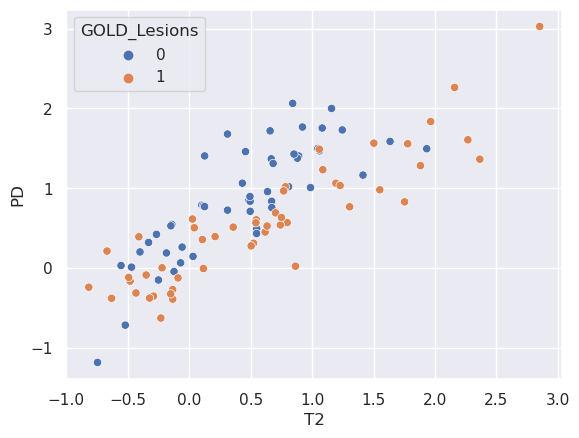

In [3]:
sns.scatterplot(data = dat, x = 'T2', y = 'PD', hue = 'GOLD_Lesions');

# Regression lines

+ If we first try to find a line that goes through the origin. so we would use the model $y_i= \beta x_i $
+ the loss function is then given by $\sum_i y_i-\beta x_i$, if we derive this loss function in respect to $\beta$ and find the value that minimizes loss: $\beta = \frac{<x,y>}{||x||^2}$.

+ This also makes sense in the special case of $x_i = constant = c$. We then have $\beta = \frac{1}{c} \overline{y}$, the prediction is then always $\overline{y}$. If there is no variation in $x$, the best way to predict any $y_i$ is to say it's the mean of observations.

+ Let's try to predict their PD values from the T2 values using a line.
+ Consider the loss function

$$
\sum_{v=1}^V (PD_v - \beta_0 - \beta_1 T2_v)^2
$$


+ A general equation for fitting a line to data is

$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2
$$


pointing out that the fitted line has to go through the point $(\bar X, \bar Y)$. 


## Some definitions

* The **covariance** is defined as  $Cov(X,Y) = \sum_{i=1}^n (Y_i - \bar Y) (X_i - \bar X) / (N-1)$
* The **standard deviation** of $X$ is $SD_X$, $\sqrt{Cov(X, X)}$
* The Pearson **correlation** is defined as $\frac{Cov(X, Y)}{SD_X \times SD_Y}$

## General solution

+ It turns out that $\beta_0$ and $\beta_1$ have optimal solutions that we can write down. We get

$$
\hat \beta_1 = Cor(X, Y) \frac{SD_Y}{SD_X}
$$

+ where $Cor(X, Y)$ is the (Pearson) **correlation** between $X$ and $Y$ and $SD_X$ is the **standard deviation** of $X$ (and $SD_Y$ is for $Y$). 


## The intercept

$$
\hat \beta_0 = \bar Y - \bar X \hat \beta_1
$$

+ where $\bar X$ and $\bar Y$ are the means. 
+ Notice this latter equation reorganized is just

$$
\bar Y = \hat \beta_0 + \bar X \hat \beta_1
$$

## Trying it out on the data

In [4]:
x = dat['T2']
y = dat['PD']
trainFraction = 0.75

## Hold out data
sample = np.random.uniform(size = 100) < trainFraction # boolean mask to select training data, take approc 75% of the data
xtrain = x[ sample] 
ytrain = y[ sample]
xtest =  x[~sample] # ~sample is equal to NOT sample
ytest =  y[~sample]

## get the slope on the training data
beta1 = st.pearsonr(xtrain, ytrain)[0] * np.std(ytrain) / np.std(xtrain)
beta0 = np.mean(ytrain) - np.mean(xtrain) * beta1
print([beta0, beta1])

[0.27395605213943724, 0.8401217113305646]


/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ghassan_unix/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


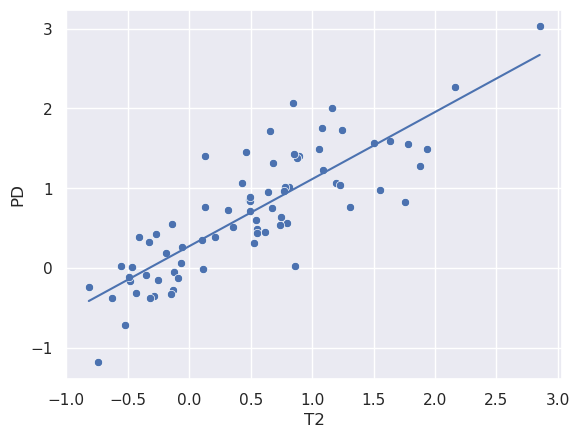

In [5]:
sns.scatterplot(x = xtrain, y = ytrain);
sns.lineplot(x = xtrain, y = beta0 + beta1 * xtrain);

LinregressResult(slope=0.7165394537744153, intercept=0.37979430758728255, rvalue=0.7900835285405753, pvalue=8.055518865241583e-18, stderr=0.06377055715137457, intercept_stderr=0.06203615347805063)


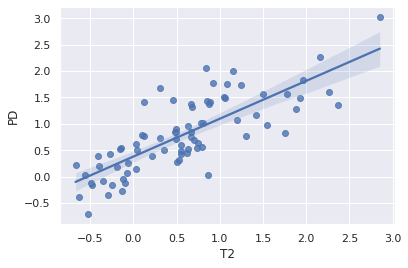

In [37]:
print(st.linregress(xtrain, ytrain))
sns.regplot(x = xtrain, y = ytrain);

# Predictions

[0.17535991377270482, 0.2176588898427987]


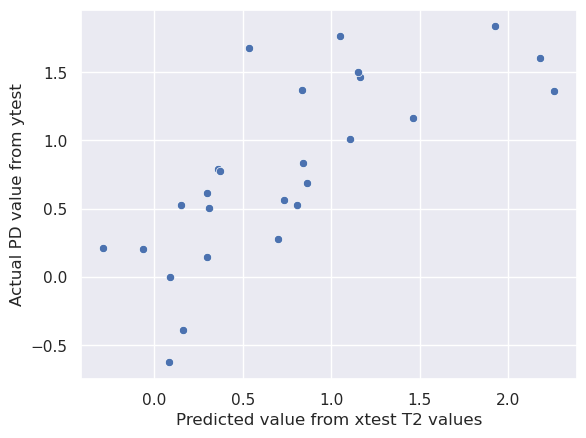

In [6]:
yhat_test = beta0 + beta1 * xtest
yhat_train = beta0 + beta1 * xtrain

## claculate the MSE in the training and test sets
print([ np.mean( (ytrain - yhat_train) ** 2), 
        np.mean( (ytest -  yhat_test) ** 2 ) ])


sns.scatterplot(x = yhat_test, y = ytest);
plt.xlabel('Predicted value from xtest T2 values');
plt.ylabel('Actual PD value from ytest');

### Multivariate Linear regression

We can also use multiple variables to predict y. So we wouldn't just fit a line but rather a plane if there is two explanatory variables x1 and x2 or a higher dimension linear system.

We also try to minimize the mean squared error. $L = ||Y-\beta X||^2$. we get, using linear algebra:
$ \hat{\beta} = (X^T X)^{-1} X^T y $
interpretation of $\beta_i$ is the expected change in y for a change of one unit in $x_i$ keeping all other variables constant.

We can imagine in a 3D space, we try to explain the outcome y through the linear plane. So our prediction is the vertical projection of the real y on the plane.

When I add a linearly redundant predictor (e.g I use X1 and X2 and I put in a new regressor X1+X2), the prediction doesn't change for any x. In fact, python even drops linearly redundant columns because it doesn't change the math. **However, it changes the interpretation of the different coefficients changes depending on what columns are dropped.**

So one might ask: why are we prompted to normalize our $X_i$ when normalization is just a linear transformation of $X_i$. It should not affect the prediction right?
- It is good practice to normalize for neural networks because their optimization is hard and messy so it actually impacts the fitting process to have everything on the same scale.
- **Normalization does not affect the fitting for a linear model**. However, it helps with **interpreting the $\beta_0$ (intercept) coefficient**. Imagine predicting BMI with blood pressure. Without normalization, $\beta_0$ is not very interesting. It means the expected BMI of someone with blood pressure = 0. That doesn't exist. But if you normalize blood pressure, you can actually interpret $\beta_0$ as the expected BMI for a person with mean BMI.

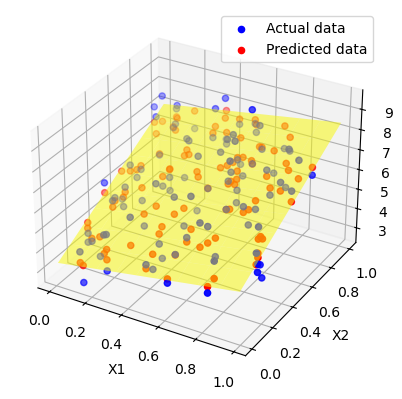

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data for demonstration
np.random.seed(0)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
Y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100)

# Fit a linear regression model
X = np.column_stack((X1, X2))
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

# Predicted values
Y_hat = X @ beta_hat

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='blue', label='Actual data')
ax.scatter(X1, X2, Y_hat, color='red', label='Predicted data')

# Create a meshgrid for the plane
X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))
Y_surf = beta_hat[0] + beta_hat[1] * X1_surf + beta_hat[2] * X2_surf
ax.plot_surface(X1_surf, X2_surf, Y_surf, color='yellow', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()
plt.show()
# Plot a vector from a real data point to its predictor
for i in range(len(X1)):
    ax.plot([X1[i], X1[i]], [X2[i], X2[i]], [Y[i], Y_hat[i]], color='green')

plt.show()